# شبکه عصبی پرسپترون چندلایه

یک کلاس به نام 

DenseMLP

داریم که در کانستراکتور آن داده های آموزش و تست به همراه لیبل آنها تنظیم می شوند. همینطور وزن ها با توزیع نرمال استاندارد و بایاس ها با صفر مقداردهی اولیه می شوند. همینطور تابع فعالسازی و مشتق آن نیز برابر با سیگموید و مشتق سیگموید قرار گرفته است.

ساختار کلی شبکه ماننده دستور کار تعین شده است. وزن ها به ترتیب از اول به آخر عبارتند از :

u, v, w

و همچنین بایاس ها نیز به ترتیب از لایه اول به آخر عبارتند از:

bu, bv, bw

-------------------------------

feed_forward:

در این تابع یک عکس به عنوان ورودی گرفته می شود و سپس هر خروجی در لایه بعد عبارت است از مجموع ضرب هر خروجی لایه قبل در وزن میان دو خروجی به علاوه بایاس آن که  از آنها سیگموید گرفته شده است. به این ترتیب خروجی کلی شبکه یعنی آ4 همراه با نتایج میانی آن محاسبه می شود و خروجی داده می شود.

predict:

در این تابع برای یک ورودی روند 

feed forward 

انجام شده و نتیجه آن به صورت ایندکس کلاس تشخیص داده شده خروجی داده می شود.

test_n و train_n:

در این دو تابع برای تعداد مشخص ورودی گرفته شده از مجموعه داده آموزش یا تست، شبکه ما آزمون می شود.

به این صورت که برای هر داده با استفاده از تابع 

predict

خروجی شبکه مشخص می شود و سپس با لیبل مشخص شده از مجموعه داده مقایسه می شود و در صورت پیشبینی صحیح شبکه، آن را می شمارد. در نهایت بر تعداد کل عکس های مد نظر تقسیم می کنیم تا دقت کلی را بدست بیاوریم.

get_cost:

تابع هزینه ما را تعریف می کند که برابر است با مجموع مربعات فاصله خروجی شبکه از پاسخ اصلی برای یک ورودی بخصوص

compute_gradient:

در این تابع ابتدا توسط 

feed_forward

نتایج اصلی و میانی شبکه برای آن ورودی بخصوص بدست می آید. سپس با استفاده از روش گرادیان، تاثیرات هر وزن و بایاس را بر هزینه کل با استفاده از گرادیان هزینه کل به آن وزن یا بایاس بدست می آوریم و برای این کار از قواعد زنجیری استفاده می کنیم. در انتهای این تابع، گرادیان هزینه به تمامی وزن ها و بایاس ها همراه با هزینه کل ( برای جلوگیری از محاسبه دوباره آن) را خروجی می دهیم.

در این تابع تک تک وزن ها به تنهایی در حلقه های تو در تو محاسبه می شوند. برای پیاده سازی بهینه تر نسخه 

vectorize 

آن نیز در ادامه مطرح شده است.

compute_gradient_vec:

در اینجا نیز مانند تابع قبل قصد محاسبه گرادیان برای هزینه بدست آمده برای یک ورودی خاص نسبت به تمامی وزن ها و بایاس ها را داریم و این کار را به وسیله ماتریس ها و بردار ها انجام می دهیم که از لحاظ عملکرد نتیجه بهتری نسبت به تابع قبل نشان می دهد.

gradient_descent و gradient_descent_vec:

الگوریتم گرادیان کاهشی را برای محاسبه با ویا بدون برداری گرادیان در اینجا پیاده سازی کرده ایم

تعداد ایپاک ها از پیش مشخص می شوند و به این تعداد ما مجموعه داده مشخص شده را به خورد شبکه می دهیم، گرادیان آن را محاسبه می کنیم، و در وزن ها تاثیر میدهیم و سپس دوباره برای کل مجموعه داده این روند را تکرار می کنیم.

پس در هر ایپاک، داده ها به دسته های مساوی تقسیم می شوند و برای هر دسته داده، گرادیان هر ماتریس وزن به صورت تجمعی محاسبه می شوند(یعنی گرادیان هر ماتریس وزن برای تک تک ورودی های آن دسته محاسبه شده و جمع می شود) و نهایتا پس از اتمام دسته، با ضرب در ضریب یادگیری و تقسیم بر اندازه دسته، در ماتریس وزن های کل تاثیر داده می شود.(تمامی این محاسبات برای بایاس ها نیز انجام می شود.) سپس همین روند برای دسته های دیگر در ایپاک طی می شوند.

هنگامی که ایپاک به اتمام رسید، در شروع ایپاک بعدی مجموعه داده مورد نظر به هم ریخته می شوند و همین روند آموزش دوباره سپری می شود.

برای گرادیان کاهشی بردارسازی شده نیز همین روند طی می شود صرفا برای محاسبه گرادیان هر ماتریس وزن از تابع

compute_gradient_vec

استفاده کرده است.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

class DenseMLP():
    def __init__(self, train_set, train_labels, test_set, test_labels):
        self.train_set = train_set
        self.train_labels = train_labels
        self.test_set = test_set
        self.test_labels = test_labels
        self.u = np.random.standard_normal(size=(16, 1024))
        self.v = np.random.standard_normal(size=(16, 16))
        self.w = np.random.standard_normal(size=(4, 16))
        self.bu= np.zeros((16, 1))
        self.bv= np.zeros((16, 1))
        self.bw= np.zeros((4, 1))
        self.activation = np.vectorize(sigmoid)
        self.dactivation = np.vectorize(dsigmoid)
        
    def feed_forward(self, a1):
        assert len(a1) == 1024
        z2 = np.add(self.u.dot(a1), self.bu)
        a2 = self.activation(z2)
        z3 = np.add(self.v.dot(a2), self.bv)
        a3 = self.activation(z3)
        z4 = np.add(self.w.dot(a3), self.bw)
        a4 = self.activation(z4)
        return a2, a3, a4, z2, z3, z4
    
    def predict(self, a1):
        _1, _2, ff, _3, _4, _5 = self.feed_forward(a1)
        i = 0
        for j in range(1, len(ff)):
            if ff[j] > ff[i]:
                i = j
        return i
    
    def test_n(self, n):
        size = n if n < len(self.test_set) else len(self.test_set)
        correct = 0
        for i in range(0, size):
            in_img = self.test_set[i].reshape(1024, -1)
            res = self.predict(in_img)
            if res == self.test_labels[i]:
                correct+=1
        return correct/size
    
    def train_n(self, n):
        size = n if n < len(self.train_set) else len(self.train_set)
        correct = 0
        for i in range(0, size):
            in_img = self.train_set[i].reshape(1024, -1)
            res = self.predict(in_img)
            if res == self.train_labels[i]:
                correct+=1
        return correct/size
    
    def get_result_array(self, cl):
        ys = np.zeros(4)
        ys[cl] = 1
        return ys
    
    def get_cost(self, y, ys):
        assert len(y) == len(ys)
        cost = 0
        for i in range(len(y)):
            cost += (y[i] - ys[i])**2
        return cost
    
    def compute_gradient(self, a1, cl):
        a2, a3, a4, z2, z3, z4 = self.feed_forward(a1)
        a4s = self.get_result_array(cl)
        cost = self.get_cost(a4, a4s)
    
        gu = np.zeros((16, 1024))
        gv = np.zeros((16, 16))
        gw = np.zeros((4, 16))
        gbu = np.zeros((16, 1))
        gbv = np.zeros((16, 1))
        gbw = np.zeros((4, 1)) 
        
        for k in range(4):
            tmp = (a4[k] - a4s[k])*(self.dactivation(z4[k]))
            ## gradient of bw_k
            gbw[k] = tmp
            for j in range(16):
                ## gradient of w_jk
                res = tmp*a3[j]
                gw[k][j] = res
                
        for j in range(16):
            tmp = 0
            for k in range(4):
                tmp += (a4[k]-a4s[k])*self.dactivation(z4[k])*self.w[k][j]
            tmp = tmp * self.dactivation(z3[j])
            ## gradient of bv_j
            gbv[j] = tmp
            for i in range(16):
                ## gradient of v_ij
                res = tmp*a2[i]
                gv[j][i] = res
        
        for i in range(16):
            tmp = 0
            for k in range(4):
                ttmp = 0
                for j in range(16):
                    ttmp += self.w[k][j]*self.dactivation(z3[j])*self.v[j][i]
                tmp += (a4[k]-a4s[k])*self.dactivation(z4[k])*ttmp
            tmp = tmp * self.dactivation(z2[i])
            ## gradient of bu_i
            gbu[i] = tmp
            for h in range(1024):
                ## gradient of u_hi
                res = tmp * a1[h]
                gu[i][h] = res
                
        return gu, gv, gw, gbu, gbv, gbw, cost
    
    def compute_gradient_vec(self, a1, cl):
        a2, a3, a4, z2, z3, z4 = self.feed_forward(a1)
        a4s = self.get_result_array(cl).reshape(4,-1)
        cost = self.get_cost(a4, a4s)
    
        gu = np.zeros((16, 1024))
        gv = np.zeros((16, 16))
        gw = np.zeros((4, 16))
        gbu = np.zeros((16, 1))
        gbv = np.zeros((16, 1))
        gbw = np.zeros((4, 1)) 
        
        gbw = (a4 - a4s) * self.dactivation(z4)
        gw = gbw @ np.transpose(a3)
                
        gbv = (np.transpose(self.w) @ gbw) * self.dactivation(z3)
        gv = gbv @ np.transpose(a2)
        
        gbu = (np.transpose(self.w @ (self.dactivation(z3)* self.v)) @ gbw) * self.dactivation(z2)
        gu = gbu @ np.transpose(a1)

        return gu, gv, gw, gbu, gbv, gbw, cost
    
    def gradient_descent(self, size=200, learning_rate=0.3, batch_size=16, number_of_epochs=10):
        start_time = time.time()
        temp_train_data, temp_train_label = self.train_set[:size], self.train_labels[:size]
        mean_costs = np.array([])
        for e in range(number_of_epochs):
            ## shuffle train set
            temp_train_data, temp_train_label = shuffle(temp_train_data, temp_train_label)
            number_of_batches = int(len(temp_train_data)/batch_size)
            epoch_costs = np.array([])
            for b in range(number_of_batches):
                ## initialize weight and biases difference for this batch with zero matrices and vectors
                grad_u = np.zeros((16, 1024))
                grad_v = np.zeros((16, 16))
                grad_w = np.zeros((4, 16))
                grad_bu = np.zeros((16, 1))
                grad_bv = np.zeros((16, 1))
                grad_bw = np.zeros((4, 1))
                
                for img_index in range(batch_size):
                    ## compute gradient for weights and biases given on picture of the batch
                    index = b*batch_size + img_index
                    img, label = temp_train_data[index].reshape(1024, -1), temp_train_label[index]
                    gu, gv, gw, gbu, gbv, gbw, cost = self.compute_gradient(img, label)
                    grad_u += gu
                    grad_v += gv
                    grad_w += gw
                    grad_bu += gbu
                    grad_bv += gbv
                    grad_bw += gbw
                    epoch_costs = np.append(epoch_costs, cost)
                    
                ## after computing backpropagation on one batch, update weights and biases in the network
                
                self.w = np.subtract(self.w, (learning_rate * (grad_w / batch_size)))
                self.v = np.subtract(self.v, (learning_rate * (grad_v / batch_size)))                
                self.u = np.subtract(self.u, (learning_rate * (grad_u / batch_size)))
                self.bw = np.subtract(self.bw, (learning_rate * (grad_bw / batch_size)))
                self.bv = np.subtract(self.bv, (learning_rate * (grad_bv / batch_size)))
                self.bu = np.subtract(self.bu, (learning_rate * (grad_bu / batch_size)))
            
            ## compute avg cost in this epoch
            mean_costs = np.append(mean_costs, np.mean(epoch_costs))
        return mean_costs, (time.time() - start_time)
    
    def gradient_descent_vec(self, size=200, learning_rate=0.3, batch_size=16, number_of_epochs=10):
        start_time = time.time()
        temp_train_data, temp_train_label = self.train_set[:size], self.train_labels[:size]
        mean_costs = np.array([])
        for e in range(number_of_epochs):
            ## shuffle train set
            temp_train_data, temp_train_label = shuffle(temp_train_data, temp_train_label)
            number_of_batches = int(len(temp_train_data)/batch_size)
            epoch_costs = np.array([])
            for b in range(number_of_batches):
                ## initialize weight and biases difference for this batch with zero matrices and vectors
                grad_u = np.zeros((16, 1024))
                grad_v = np.zeros((16, 16))
                grad_w = np.zeros((4, 16))
                grad_bu = np.zeros((16, 1))
                grad_bv = np.zeros((16, 1))
                grad_bw = np.zeros((4, 1))
                
                for img_index in range(batch_size):
                    ## compute gradient for weights and biases given on picture of the batch
                    index = b*batch_size + img_index
                    img, label = temp_train_data[index].reshape(1024, -1), temp_train_label[index]
                    gu, gv, gw, gbu, gbv, gbw, cost = self.compute_gradient_vec(img, label)
                    grad_u += gu
                    grad_v += gv
                    grad_w += gw
                    grad_bu += gbu
                    grad_bv += gbv
                    grad_bw += gbw
                    epoch_costs = np.append(epoch_costs, cost)
                    
                ## after computing backpropagation on one batch, update weights and biases in the network
                
                self.w = np.subtract(self.w, (learning_rate * (grad_w / batch_size)))
                self.v = np.subtract(self.v, (learning_rate * (grad_v / batch_size)))                
                self.u = np.subtract(self.u, (learning_rate * (grad_u / batch_size)))
                self.bw = np.subtract(self.bw, (learning_rate * (grad_bw / batch_size)))
                self.bv = np.subtract(self.bv, (learning_rate * (grad_bv / batch_size)))
                self.bu = np.subtract(self.bu, (learning_rate * (grad_bu / batch_size)))
            
            ## compute avg cost in this epoch
            mean_costs = np.append(mean_costs, np.mean(epoch_costs))
        return mean_costs, (time.time() - start_time)

In [2]:
def select_set(data, labels, cat):
    selected_data = []
    data_labels = []
    for i in range(0, data.shape[0]):
        if labels[i] in cat:
            selected_data.append(data[i,:,:,:])
            data_labels.append(labels[i])
    return np.array(selected_data), np.array(data_labels)

def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def dsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))



## تابع کمکی برای خواندن CIFAR

برای خواندن مجموعه داده از فایل دریافتی از مرجع از تابع 

load_cifar_10_data 

استفاده کردیم که توسط 

[github](https://github.com/snatch59/load-cifar-10)

نوشته شده است.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names

# قدم 1-1
 
چهار ماتریس اصلی ما شامل

traind, trainl, testd, testl

هستند.

برای اینکه دستور پایین به درستی کار کند، مجموعه داده مخصوص پایتون را که از مرجع اصلی دانلود کردیم در کنار فایل نوتبوک 

extract 

می کنیم که در این صورت فولدر حاوی مجموعه داده در سطح با فایل نوتبوک خواهد بود.

In [4]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

print(f'original train set: {train_data.shape}')

original train set: (50000, 32, 32, 3)


In [5]:
traind, trainl = select_set(train_data, train_labels, [0, 1, 2, 3])
testd, testl = select_set(test_data, test_labels, [0, 1, 2, 3])

In [6]:
print(f'selected train set: {traind.shape}')
print(f'their labels: {trainl.shape}')
print(f'selected train set: {testd.shape}')
print(f'their labels: {testl.shape}')

selected train set: (20000, 32, 32, 3)
their labels: (20000,)
selected train set: (4000, 32, 32, 3)
their labels: (4000,)


b'automobile'


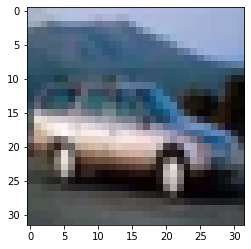

In [31]:
print(label_names[trainl[0]])
plt.imshow(traind[0,...])

## قدم 1-2

با استفاده از تابع 

rgb2gray 

تبدیل تصاویر رنگی به تصاویر خاکستری انجام می شود.

traindg, testdg

In [32]:
traindg = rgb2gray(traind)
testdg = rgb2gray(testd)

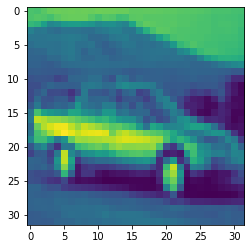

In [33]:
plt.imshow(traindg[0])

## قدم 1-3

تمام داده ها را تقسیم بر 255 می کنیم تا همگی در بازه 0 تا 1 قرار بگیرند

In [34]:
traindgn, testdgn = (traindg/255.0), (testdg/255.0)

## قدم 1-4

عمل

flat

کردن داده ها از طریق تابع

reshape

انجام گرفت

In [35]:
traindgn.shape

(20000, 32, 32)

In [36]:
traindgnf = traindgn.reshape(-1, 1024)
testdgnf = testdgn.reshape(-1, 1024)
print(traindgnf.shape)
print(testdgnf.shape)

(20000, 1024)
(4000, 1024)


## قدم 1-5

به وسیله تابع 

shuffle

دو آرایه 

traindgnf و trainl

که داده های آموزش و برچسب های آنها هستند را به هم ریخته می کنیم. از این تابع در هر 

epoch

برای به هم ریختن دوباره مجموعه داده های آموزشی استفاده خواهیم کرد.

In [37]:
traindgnfs, trainls = shuffle(traindgnf, trainl)

## قدم 2

در کلاس 

DenseMLP

ابتدا مجموعه داده آموزش و تست ما ورودی گرفته میشوند و همچنین وزن های مدل مقداردهی اولیه می شود. مقدار یال ها طبق توزیع نرمال و مقدار بایاس ها با صفر مقداردهی اولیه می شوند.

در تابع 

feed_forward

یک عکس ورودی گرفته می شود و خروجی شبکه در 4 نرون مشخص می شود.
در تابع 

predict

مشخص می شود شبکه عصبی عکس ورودی گرفته را به چه لیبلی نسبت می دهد.
در تابع 

test_n

تعداد عکس هایی که میخواهد تست کند و دقت را بسنجد ورودی می گیرد و سپس به آن تعداد عکس از مجموعه داده آموزش جدا می کند و نتیجه خروجی شبکه عصبی را با لیبل اصلی آن تطبیق می دهد و دقت را پس از اتمام این تعداد، محاسبه می کند

In [38]:
mlp = DenseMLP(traindgnfs, trainls, testdgnf, testl)

print(f'accuracy: {mlp.test_n(200)}')

accuracy: 0.245


## قدم سوم

در این مرحله از روش گرادیان کاهشی استفاده کردیم تا وزن ها و بایاس ها را تغیر دهیم به گونه ای که بتوانند عکس های بیشتری را دسته بندی صحیح انجام دهند.

طبق خواسته دستور کار از 200 داده اول مجموعه داده آموزش استفاده شده است

دیگر هایپرپارامترها عبارتند از:

ضریب یادگیری 0.3

batch size = 16

و تعداد ایپاک های 10

In [41]:
mlp = DenseMLP(traindgnfs, trainls, testdgnf, testl)
print(f'start accuracy: {mlp.test_n(200)}')

start accuracy: 0.31


finish accuracy: 0.38
execution time: 80.91929459571838s


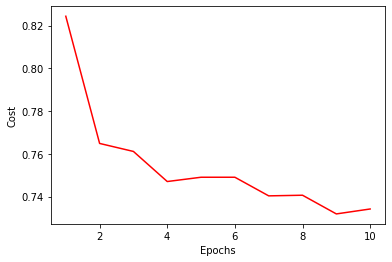

In [42]:
costs, exec_time = mlp.gradient_descent(size=200, number_of_epochs=10)
print(f'finish accuracy: {mlp.test_n(200)}')
print(f'execution time: {exec_time}s')
x = np.arange(1, 11)
plt.plot(x, costs, color ="red")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

## قدم چهارم

در این مرحله عملیات محاسبه گرادیان برای وزن‌ها را 

vectorized

کردیم تا به وسیله بهینه سازی هایی که برای عملیات های ماتریسی انجام میگیرد، سرعت محاسبه کل افزایش یابد.

از میان هایپرپارامتر ها تعداد ایپاک ها به 20 افزایش یافت.

همچنین 10 بار از ابتدا شبکه را مقداردهی می کنیم و آموزش میدهیم تا دقت و زمان آموزش را برای این 10 بار میانگین بگیریم

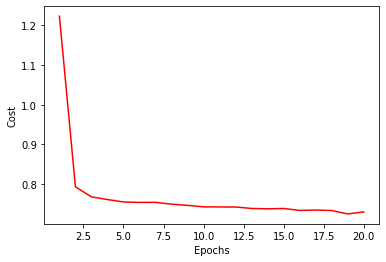

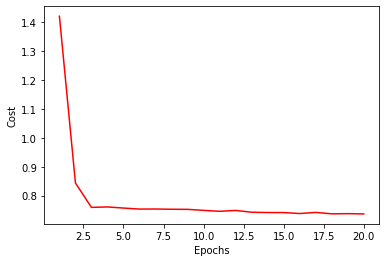

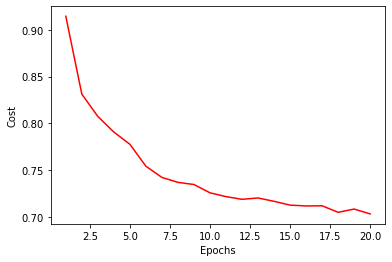

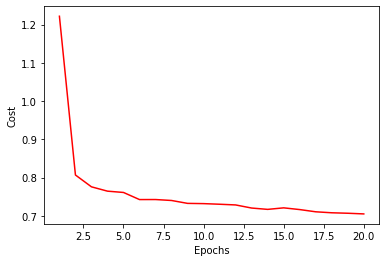

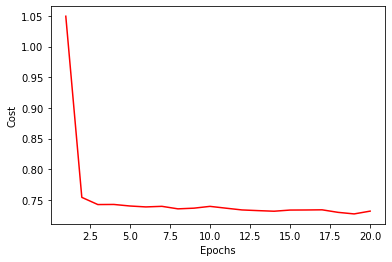

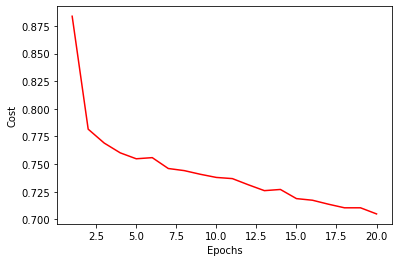

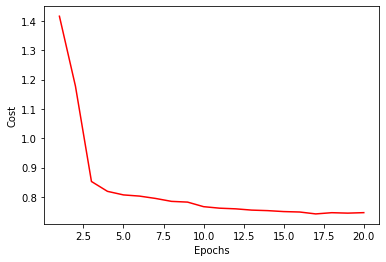

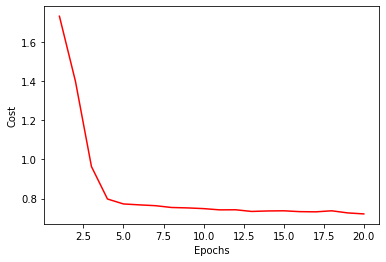

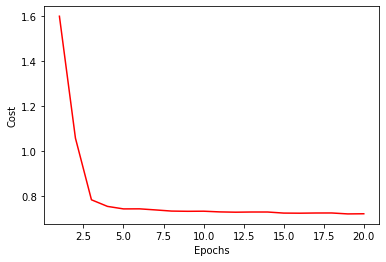

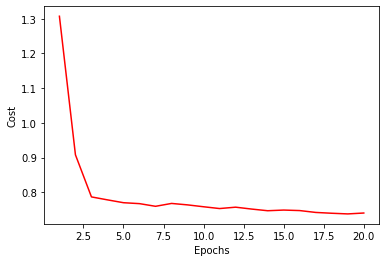

avg accuracy: 0.292
avg exec time: 1.4956510543823243s


In [21]:
total_accuracy = 0
total_exec_time = 0
for i in range(10):
    mlp = DenseMLP(traindgnfs, trainls, testdgnf, testl)
    costs, exec_time = mlp.gradient_descent_vec(size=200, number_of_epochs=20)
    total_accuracy += mlp.test_n(200)
    total_exec_time += exec_time
    x = np.arange(1, 21)
    plt.plot(x, costs, color ="red")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.show()
print(f'avg accuracy: {total_accuracy/10}')
print(f'avg exec time: {total_exec_time/10}s')

## قدم پنجم

در این قدم شبکه را با 8000 داده در 40 ایپاک آموزش می‌دهیم و سپس توسط داده های آموزش و تست، می‌آزماییم. 

avg test accuracy: 0.48675
avg train accuracy: 0.513875
avg exec time: 135.17285227775574s


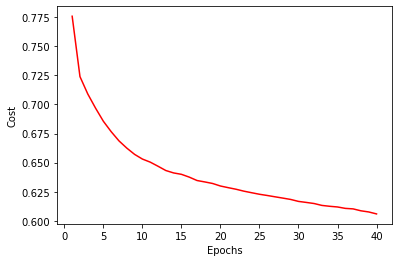

In [22]:
mlp = DenseMLP(traindgnfs, trainls, testdgnf, testl)
costs, exec_time = mlp.gradient_descent_vec(size=8000, number_of_epochs=40)
print(f'avg test accuracy: {mlp.test_n(8000)}')
print(f'avg train accuracy: {mlp.train_n(8000)}')
print(f'avg exec time: {exec_time}s')
x = np.arange(1, 41)
plt.plot(x, costs, color ="red")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [23]:
total_train_accuracy = 0
total_test_accuracy = 0
total_exec_time = 0
for i in range(10):
    mlp = DenseMLP(traindgnfs, trainls, testdgnf, testl)
    costs, exec_time = mlp.gradient_descent_vec(size=8000, number_of_epochs=40)
    total_test_accuracy += mlp.test_n(8000)
    total_train_accuracy += mlp.train_n(8000)
    total_exec_time += exec_time
print(f'avg test accuracy: {total_test_accuracy/10}')
print(f'avg train accuracy: {total_train_accuracy/10}')
print(f'avg exec time: {total_exec_time/10}s')

avg test accuracy: 0.4795
avg train accuracy: 0.5184625
avg exec time: 143.38499462604523s
